In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: BAC-PL
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


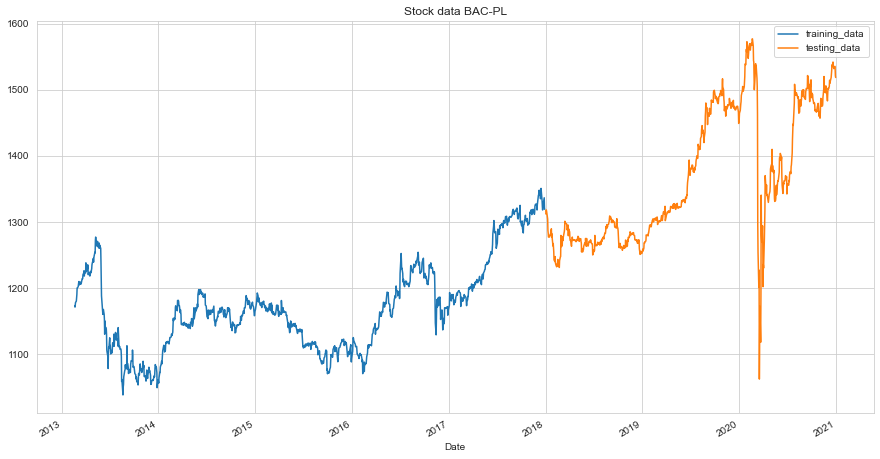

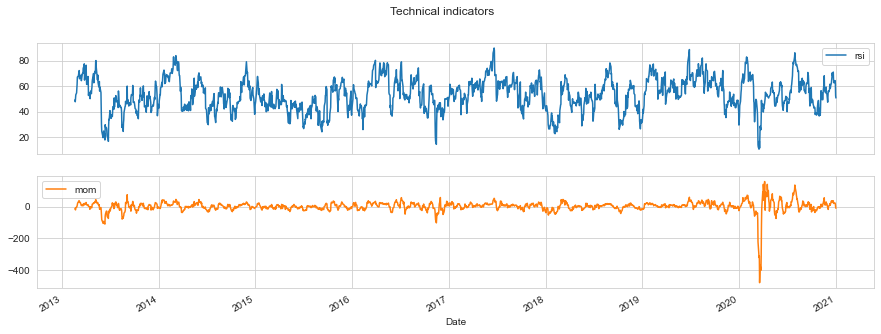

In [2]:
stock_name = 'bac-pl'.upper()
industry = 'Financial Services'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1040.53, duration: 0:00:00.187990
episode: 2/2000, episode end value: 1040.42, duration: 0:00:00.193011
episode: 3/2000, episode end value: 1029.36, duration: 0:00:00.193958
episode: 4/2000, episode end value: 1045.81, duration: 0:00:00.205016
episode: 5/2000, episode end value: 1033.81, duration: 0:00:00.207289
episode: 6/2000, episode end value: 1032.82, duration: 0:00:00.204063
episode: 7/2000, episode end value: 1053.91, duration: 0:00:00.229034
episode: 8/2000, episode end value: 1042.19, duration: 0:00:00.211048
episode: 9/2000, episode end value: 1038.27, duration: 0:00:00.205045
episode: 10/2000, episode end value: 1034.44, duration: 0:00:00.210046
episode: 11/2000, episode end value: 1047.64, duration: 0:00:00.204045
episode: 12/2000, episode end value: 1038.29, duration: 0:00:00.200044
episode: 13/2000, episode end value: 1041.03, duration: 0:00:00.204036
episode: 14/2000, episode end value: 1039.58, duration: 0:00:00.212061
episode: 15/200

episode: 117/2000, episode end value: 1037.97, duration: 0:00:00.222045
episode: 118/2000, episode end value: 1035.74, duration: 0:00:00.220054
episode: 119/2000, episode end value: 1038.14, duration: 0:00:00.227051
episode: 120/2000, episode end value: 1038.40, duration: 0:00:00.224581
episode: 121/2000, episode end value: 1037.67, duration: 0:00:00.229139
episode: 122/2000, episode end value: 1033.47, duration: 0:00:00.206045
episode: 123/2000, episode end value: 1032.89, duration: 0:00:00.215027
episode: 124/2000, episode end value: 1032.13, duration: 0:00:00.209055
episode: 125/2000, episode end value: 1034.01, duration: 0:00:00.223044
episode: 126/2000, episode end value: 1033.56, duration: 0:00:00.213061
episode: 127/2000, episode end value: 1036.68, duration: 0:00:00.223789
episode: 128/2000, episode end value: 1040.98, duration: 0:00:00.224033
episode: 129/2000, episode end value: 1044.74, duration: 0:00:00.219069
episode: 130/2000, episode end value: 1041.58, duration: 0:00:00

episode: 231/2000, episode end value: 1037.55, duration: 0:00:00.222035
episode: 232/2000, episode end value: 1041.50, duration: 0:00:00.250068
episode: 233/2000, episode end value: 1034.58, duration: 0:00:00.257043
episode: 234/2000, episode end value: 1036.19, duration: 0:00:00.255131
episode: 235/2000, episode end value: 1037.07, duration: 0:00:00.252457
episode: 236/2000, episode end value: 1039.36, duration: 0:00:00.257108
episode: 237/2000, episode end value: 1037.02, duration: 0:00:00.255056
episode: 238/2000, episode end value: 1036.87, duration: 0:00:00.258062
episode: 239/2000, episode end value: 1040.75, duration: 0:00:00.263058
episode: 240/2000, episode end value: 1039.48, duration: 0:00:00.288066
episode: 241/2000, episode end value: 1039.62, duration: 0:00:00.271067
episode: 242/2000, episode end value: 1039.82, duration: 0:00:00.286054
episode: 243/2000, episode end value: 1040.28, duration: 0:00:00.299064
episode: 244/2000, episode end value: 1041.64, duration: 0:00:00

episode: 345/2000, episode end value: 1039.35, duration: 0:00:00.282056
episode: 346/2000, episode end value: 1033.56, duration: 0:00:00.254056
episode: 347/2000, episode end value: 1032.53, duration: 0:00:00.251056
episode: 348/2000, episode end value: 1036.38, duration: 0:00:00.262058
episode: 349/2000, episode end value: 1034.76, duration: 0:00:00.257058
episode: 350/2000, episode end value: 1037.57, duration: 0:00:00.272061
episode: 351/2000, episode end value: 1035.92, duration: 0:00:00.278063
episode: 352/2000, episode end value: 1034.58, duration: 0:00:00.269100
episode: 353/2000, episode end value: 1033.54, duration: 0:00:00.255058
episode: 354/2000, episode end value: 1038.88, duration: 0:00:00.267076
episode: 355/2000, episode end value: 1038.83, duration: 0:00:00.254059
episode: 356/2000, episode end value: 1037.23, duration: 0:00:00.266059
episode: 357/2000, episode end value: 1036.61, duration: 0:00:00.264058
episode: 358/2000, episode end value: 1038.06, duration: 0:00:00

episode: 459/2000, episode end value: 1035.85, duration: 0:00:00.311078
episode: 460/2000, episode end value: 1029.67, duration: 0:00:00.315071
episode: 461/2000, episode end value: 1033.36, duration: 0:00:00.300068
episode: 462/2000, episode end value: 1031.08, duration: 0:00:00.301071
episode: 463/2000, episode end value: 1035.42, duration: 0:00:00.309069
episode: 464/2000, episode end value: 1038.14, duration: 0:00:00.309067
episode: 465/2000, episode end value: 1048.25, duration: 0:00:00.313071
episode: 466/2000, episode end value: 1036.55, duration: 0:00:00.327074
episode: 467/2000, episode end value: 1037.01, duration: 0:00:00.298064
episode: 468/2000, episode end value: 1041.33, duration: 0:00:00.300066
episode: 469/2000, episode end value: 1036.82, duration: 0:00:00.314071
episode: 470/2000, episode end value: 1044.80, duration: 0:00:00.311075
episode: 471/2000, episode end value: 1039.51, duration: 0:00:00.332072
episode: 472/2000, episode end value: 1040.35, duration: 0:00:00

episode: 573/2000, episode end value: 1037.04, duration: 0:00:00.374083
episode: 574/2000, episode end value: 1034.02, duration: 0:00:00.391087
episode: 575/2000, episode end value: 1036.27, duration: 0:00:00.378087
episode: 576/2000, episode end value: 1038.40, duration: 0:00:00.403092
episode: 577/2000, episode end value: 1034.25, duration: 0:00:00.389085
episode: 578/2000, episode end value: 1031.17, duration: 0:00:00.404092
episode: 579/2000, episode end value: 1030.70, duration: 0:00:00.396090
episode: 580/2000, episode end value: 1043.10, duration: 0:00:00.418095
episode: 581/2000, episode end value: 1041.15, duration: 0:00:00.428098
episode: 582/2000, episode end value: 1040.60, duration: 0:00:00.407094
episode: 583/2000, episode end value: 1037.36, duration: 0:00:00.387088
episode: 584/2000, episode end value: 1039.27, duration: 0:00:00.405088
episode: 585/2000, episode end value: 1035.58, duration: 0:00:00.371084
episode: 586/2000, episode end value: 1038.59, duration: 0:00:00

episode: 687/2000, episode end value: 1032.41, duration: 0:00:00.516117
episode: 688/2000, episode end value: 1038.93, duration: 0:00:00.508167
episode: 689/2000, episode end value: 1032.54, duration: 0:00:00.416578
episode: 690/2000, episode end value: 1037.03, duration: 0:00:00.516028
episode: 691/2000, episode end value: 1029.24, duration: 0:00:00.469107
episode: 692/2000, episode end value: 1039.53, duration: 0:00:00.480106
episode: 693/2000, episode end value: 1037.98, duration: 0:00:00.432096
episode: 694/2000, episode end value: 1038.89, duration: 0:00:00.464102
episode: 695/2000, episode end value: 1042.44, duration: 0:00:00.516121
episode: 696/2000, episode end value: 1036.37, duration: 0:00:00.414092
episode: 697/2000, episode end value: 1040.23, duration: 0:00:00.481106
episode: 698/2000, episode end value: 1036.85, duration: 0:00:00.464691
episode: 699/2000, episode end value: 1037.18, duration: 0:00:00.511519
episode: 700/2000, episode end value: 1038.97, duration: 0:00:00

episode: 801/2000, episode end value: 1036.12, duration: 0:00:00.494109
episode: 802/2000, episode end value: 1037.85, duration: 0:00:00.585131
episode: 803/2000, episode end value: 1031.18, duration: 0:00:00.507096
episode: 804/2000, episode end value: 1036.77, duration: 0:00:00.516119
episode: 805/2000, episode end value: 1032.70, duration: 0:00:00.496115
episode: 806/2000, episode end value: 1035.01, duration: 0:00:00.554125
episode: 807/2000, episode end value: 1040.20, duration: 0:00:00.504113
episode: 808/2000, episode end value: 1035.31, duration: 0:00:00.557126
episode: 809/2000, episode end value: 1034.38, duration: 0:00:00.510113
episode: 810/2000, episode end value: 1036.49, duration: 0:00:00.503115
episode: 811/2000, episode end value: 1030.56, duration: 0:00:00.439100
episode: 812/2000, episode end value: 1035.83, duration: 0:00:00.515110
episode: 813/2000, episode end value: 1031.30, duration: 0:00:00.544130
episode: 814/2000, episode end value: 1035.88, duration: 0:00:00

episode: 915/2000, episode end value: 1042.40, duration: 0:00:00.508115
episode: 916/2000, episode end value: 1037.11, duration: 0:00:00.593138
episode: 917/2000, episode end value: 1037.59, duration: 0:00:00.530117
episode: 918/2000, episode end value: 1040.91, duration: 0:00:00.555337
episode: 919/2000, episode end value: 1035.97, duration: 0:00:00.548379
episode: 920/2000, episode end value: 1035.10, duration: 0:00:00.520619
episode: 921/2000, episode end value: 1034.59, duration: 0:00:00.608139
episode: 922/2000, episode end value: 1035.11, duration: 0:00:00.592136
episode: 923/2000, episode end value: 1030.88, duration: 0:00:00.529116
episode: 924/2000, episode end value: 1034.60, duration: 0:00:00.577130
episode: 925/2000, episode end value: 1036.18, duration: 0:00:00.561127
episode: 926/2000, episode end value: 1033.98, duration: 0:00:00.550124
episode: 927/2000, episode end value: 1035.35, duration: 0:00:00.669152
episode: 928/2000, episode end value: 1032.58, duration: 0:00:00

episode: 1029/2000, episode end value: 1037.60, duration: 0:00:00.512111
episode: 1030/2000, episode end value: 1035.42, duration: 0:00:00.503110
episode: 1031/2000, episode end value: 1033.41, duration: 0:00:00.477110
episode: 1032/2000, episode end value: 1034.16, duration: 0:00:00.588031
episode: 1033/2000, episode end value: 1035.80, duration: 0:00:00.532607
episode: 1034/2000, episode end value: 1037.79, duration: 0:00:00.527497
episode: 1035/2000, episode end value: 1033.34, duration: 0:00:00.501107
episode: 1036/2000, episode end value: 1037.10, duration: 0:00:00.532119
episode: 1037/2000, episode end value: 1036.94, duration: 0:00:00.551122
episode: 1038/2000, episode end value: 1033.75, duration: 0:00:00.545130
episode: 1039/2000, episode end value: 1036.50, duration: 0:00:00.515110
episode: 1040/2000, episode end value: 1037.13, duration: 0:00:00.519117
episode: 1041/2000, episode end value: 1034.90, duration: 0:00:00.507120
episode: 1042/2000, episode end value: 1032.75, dur

episode: 1142/2000, episode end value: 1033.58, duration: 0:00:00.488982
episode: 1143/2000, episode end value: 1034.02, duration: 0:00:00.540722
episode: 1144/2000, episode end value: 1030.97, duration: 0:00:00.529125
episode: 1145/2000, episode end value: 1043.87, duration: 0:00:00.549125
episode: 1146/2000, episode end value: 1031.68, duration: 0:00:00.575130
episode: 1147/2000, episode end value: 1034.81, duration: 0:00:00.546129
episode: 1148/2000, episode end value: 1033.89, duration: 0:00:00.512111
episode: 1149/2000, episode end value: 1031.37, duration: 0:00:00.493113
episode: 1150/2000, episode end value: 1037.46, duration: 0:00:00.494256
episode: 1151/2000, episode end value: 1041.11, duration: 0:00:00.593507
episode: 1152/2000, episode end value: 1023.63, duration: 0:00:00.500801
episode: 1153/2000, episode end value: 1038.87, duration: 0:00:00.523200
episode: 1154/2000, episode end value: 1029.39, duration: 0:00:00.446000
episode: 1155/2000, episode end value: 1041.41, dur

episode: 1255/2000, episode end value: 1032.06, duration: 0:00:00.580134
episode: 1256/2000, episode end value: 1037.78, duration: 0:00:00.572133
episode: 1257/2000, episode end value: 1037.70, duration: 0:00:00.500113
episode: 1258/2000, episode end value: 1037.89, duration: 0:00:00.490111
episode: 1259/2000, episode end value: 1036.34, duration: 0:00:00.502113
episode: 1260/2000, episode end value: 1034.73, duration: 0:00:00.480109
episode: 1261/2000, episode end value: 1036.66, duration: 0:00:00.491112
episode: 1262/2000, episode end value: 1034.21, duration: 0:00:00.499113
episode: 1263/2000, episode end value: 1039.06, duration: 0:00:00.534116
episode: 1264/2000, episode end value: 1031.39, duration: 0:00:00.487111
episode: 1265/2000, episode end value: 1040.68, duration: 0:00:00.493109
episode: 1266/2000, episode end value: 1035.56, duration: 0:00:00.512112
episode: 1267/2000, episode end value: 1034.67, duration: 0:00:00.498115
episode: 1268/2000, episode end value: 1036.22, dur

episode: 1368/2000, episode end value: 1030.48, duration: 0:00:00.571128
episode: 1369/2000, episode end value: 1035.52, duration: 0:00:00.538116
episode: 1370/2000, episode end value: 1032.02, duration: 0:00:00.558126
episode: 1371/2000, episode end value: 1032.11, duration: 0:00:00.506115
episode: 1372/2000, episode end value: 1035.72, duration: 0:00:00.536649
episode: 1373/2000, episode end value: 1030.72, duration: 0:00:00.550162
episode: 1374/2000, episode end value: 1035.13, duration: 0:00:00.585130
episode: 1375/2000, episode end value: 1030.41, duration: 0:00:00.528120
episode: 1376/2000, episode end value: 1035.22, duration: 0:00:00.571639
episode: 1377/2000, episode end value: 1032.03, duration: 0:00:00.523031
episode: 1378/2000, episode end value: 1031.34, duration: 0:00:00.539124
episode: 1379/2000, episode end value: 1034.35, duration: 0:00:00.562125
episode: 1380/2000, episode end value: 1031.62, duration: 0:00:00.577136
episode: 1381/2000, episode end value: 1040.44, dur

episode: 1481/2000, episode end value: 1038.96, duration: 0:00:00.517994
episode: 1482/2000, episode end value: 1030.45, duration: 0:00:00.520115
episode: 1483/2000, episode end value: 1037.30, duration: 0:00:00.517119
episode: 1484/2000, episode end value: 1035.22, duration: 0:00:00.596133
episode: 1485/2000, episode end value: 1030.22, duration: 0:00:00.493107
episode: 1486/2000, episode end value: 1039.61, duration: 0:00:00.465101
episode: 1487/2000, episode end value: 1032.86, duration: 0:00:00.496114
episode: 1488/2000, episode end value: 1032.97, duration: 0:00:00.513119
episode: 1489/2000, episode end value: 1034.90, duration: 0:00:00.576130
episode: 1490/2000, episode end value: 1032.78, duration: 0:00:00.553122
episode: 1491/2000, episode end value: 1032.33, duration: 0:00:00.566128
episode: 1492/2000, episode end value: 1031.50, duration: 0:00:00.554127
episode: 1493/2000, episode end value: 1035.65, duration: 0:00:00.530123
episode: 1494/2000, episode end value: 1036.83, dur

episode: 1594/2000, episode end value: 1034.00, duration: 0:00:00.522118
episode: 1595/2000, episode end value: 1032.28, duration: 0:00:00.581130
episode: 1596/2000, episode end value: 1033.95, duration: 0:00:00.507115
episode: 1597/2000, episode end value: 1030.78, duration: 0:00:00.575129
episode: 1598/2000, episode end value: 1032.27, duration: 0:00:00.548125
episode: 1599/2000, episode end value: 1031.77, duration: 0:00:00.503116
episode: 1600/2000, episode end value: 1032.00, duration: 0:00:00.535121
episode: 1601/2000, episode end value: 1031.55, duration: 0:00:00.542120
episode: 1602/2000, episode end value: 1032.32, duration: 0:00:00.542117
episode: 1603/2000, episode end value: 1031.10, duration: 0:00:00.538126
episode: 1604/2000, episode end value: 1032.20, duration: 0:00:00.560121
episode: 1605/2000, episode end value: 1033.31, duration: 0:00:00.537123
episode: 1606/2000, episode end value: 1026.90, duration: 0:00:00.469104
episode: 1607/2000, episode end value: 1041.49, dur

episode: 1707/2000, episode end value: 1032.31, duration: 0:00:00.573131
episode: 1708/2000, episode end value: 1029.91, duration: 0:00:00.514113
episode: 1709/2000, episode end value: 1031.65, duration: 0:00:00.621138
episode: 1710/2000, episode end value: 1033.04, duration: 0:00:00.618142
episode: 1711/2000, episode end value: 1030.76, duration: 0:00:00.549119
episode: 1712/2000, episode end value: 1031.71, duration: 0:00:00.579137
episode: 1713/2000, episode end value: 1033.11, duration: 0:00:00.554125
episode: 1714/2000, episode end value: 1030.38, duration: 0:00:00.601137
episode: 1715/2000, episode end value: 1035.02, duration: 0:00:00.617144
episode: 1716/2000, episode end value: 1022.48, duration: 0:00:00.601138
episode: 1717/2000, episode end value: 1036.97, duration: 0:00:00.601134
episode: 1718/2000, episode end value: 1034.22, duration: 0:00:00.530660
episode: 1719/2000, episode end value: 1034.09, duration: 0:00:00.553242
episode: 1720/2000, episode end value: 1031.92, dur

episode: 1820/2000, episode end value: 1033.87, duration: 0:00:00.596136
episode: 1821/2000, episode end value: 1038.34, duration: 0:00:00.490109
episode: 1822/2000, episode end value: 1033.39, duration: 0:00:00.450102
episode: 1823/2000, episode end value: 1037.17, duration: 0:00:00.540127
episode: 1824/2000, episode end value: 1033.96, duration: 0:00:00.452102
episode: 1825/2000, episode end value: 1036.90, duration: 0:00:00.512115
episode: 1826/2000, episode end value: 1035.24, duration: 0:00:00.519121
episode: 1827/2000, episode end value: 1037.59, duration: 0:00:00.537118
episode: 1828/2000, episode end value: 1035.96, duration: 0:00:00.513116
episode: 1829/2000, episode end value: 1036.79, duration: 0:00:00.516115
episode: 1830/2000, episode end value: 1032.97, duration: 0:00:00.568127
episode: 1831/2000, episode end value: 1036.85, duration: 0:00:00.526124
episode: 1832/2000, episode end value: 1036.47, duration: 0:00:00.532120
episode: 1833/2000, episode end value: 1031.71, dur

episode: 1933/2000, episode end value: 1030.14, duration: 0:00:00.465104
episode: 1934/2000, episode end value: 1035.54, duration: 0:00:00.542124
episode: 1935/2000, episode end value: 1031.06, duration: 0:00:00.485709
episode: 1936/2000, episode end value: 1033.73, duration: 0:00:00.528121
episode: 1937/2000, episode end value: 1033.01, duration: 0:00:00.427096
episode: 1938/2000, episode end value: 1032.11, duration: 0:00:00.463348
episode: 1939/2000, episode end value: 1032.30, duration: 0:00:00.521584
episode: 1940/2000, episode end value: 1032.83, duration: 0:00:00.534120
episode: 1941/2000, episode end value: 1031.24, duration: 0:00:00.483115
episode: 1942/2000, episode end value: 1030.20, duration: 0:00:00.497115
episode: 1943/2000, episode end value: 1032.25, duration: 0:00:00.500133
episode: 1944/2000, episode end value: 1031.52, duration: 0:00:00.469103
episode: 1945/2000, episode end value: 1032.07, duration: 0:00:00.555161
episode: 1946/2000, episode end value: 1032.38, dur

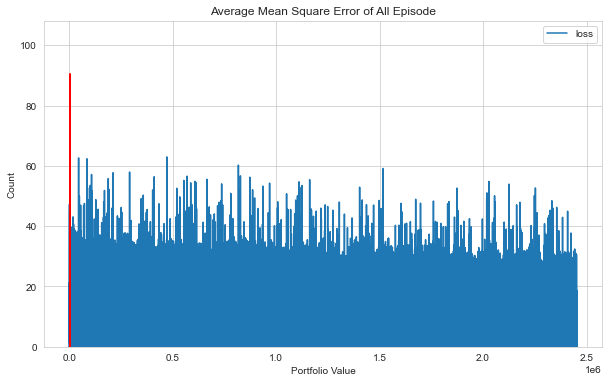

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

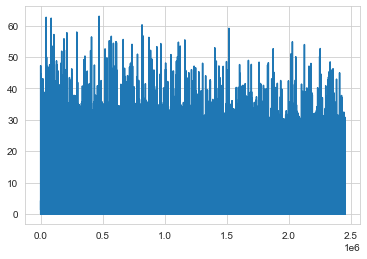

In [5]:
plt.plot(agent.model.losses)

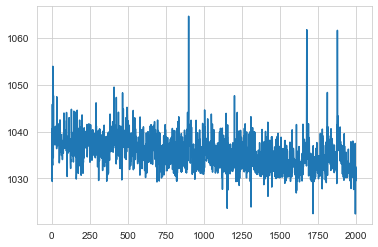

In [6]:
plt.plot(portfolio_value)

episode end value: 1087.51, duration: 0:00:00.188041
Sell: 404 times, Buy: 340 times


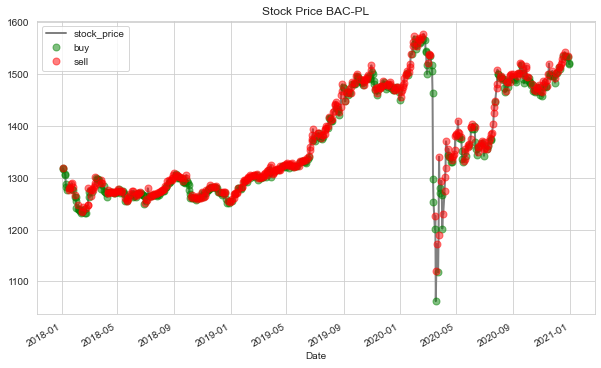

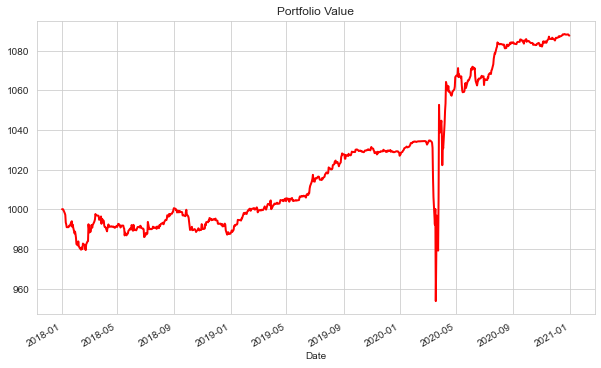

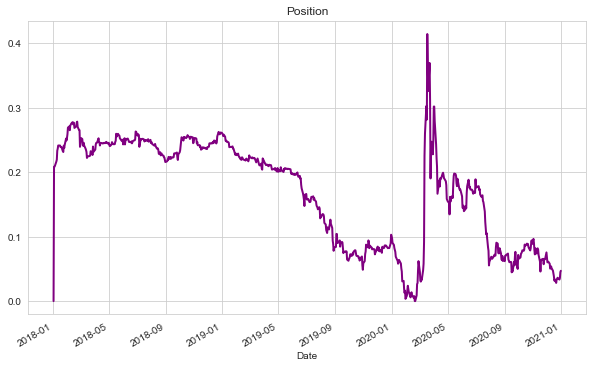

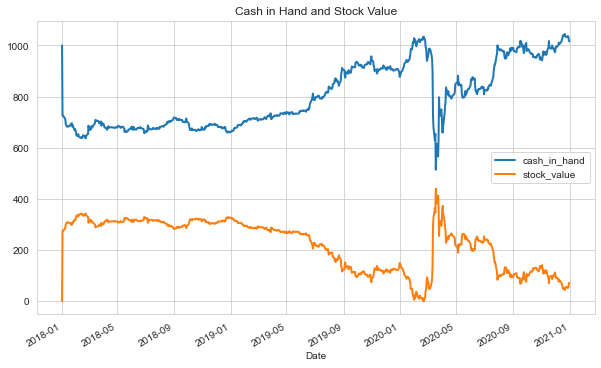

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: BAC-PL
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 2.84 %
Volatility: 0.0540
shape ratio: 0.3217
Maximun drawdown: -7.83 %
Calmar ratio: 0.3622
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 4.99 %
Volatility (benchmark): 0.1762
shape ratio: 0.2210
Maximun drawdown: -32.65 %
Calmar ratio (benchmark): 0.1530


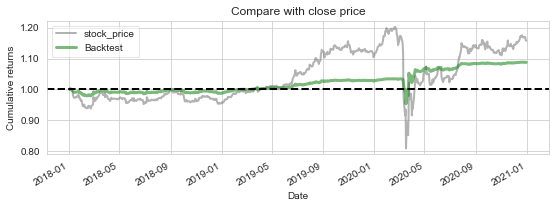

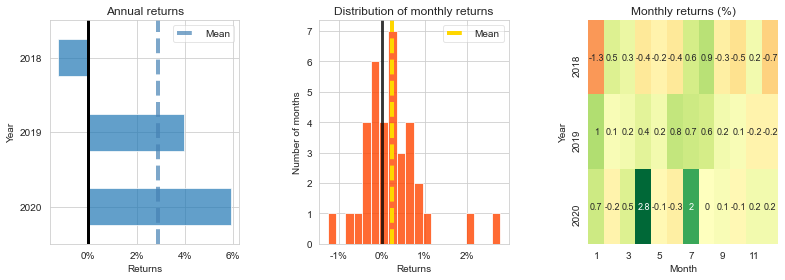

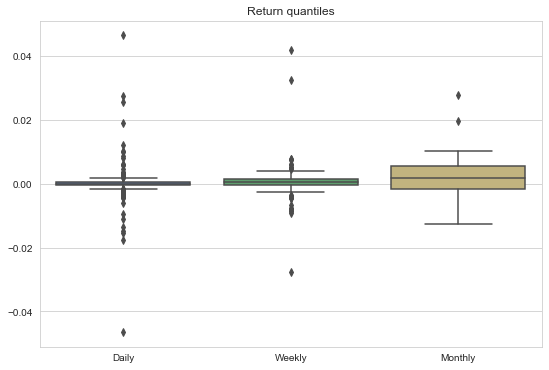

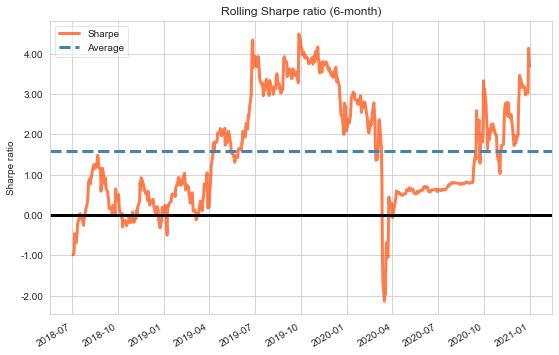

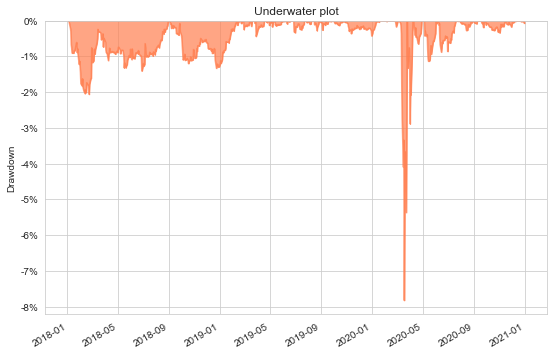

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')